Gather

In [2]:
#Import Pandas Library
import pandas as pd

#Read the data from the datafile csv file
df = pd.read_csv('datafile.csv')

Assess

In [3]:
#Print the full list of headings for df without truncating the list
pd.set_option('display.max_columns', None)
print(df.head())

            District Names                   State/UT  \
0                 Nicobars  Andaman & Nicobar Islands   
1  North & Middle Andaman   Andaman & Nicobar Islands   
2           South Andaman   Andaman & Nicobar Islands   
3              Srikakulam              Andhra Pradesh   
4            Vizianagaram              Andhra Pradesh   

   Number of Households surveyed  Number of Women age 15-49 years interviewed  \
0                            882                                          764   
1                            874                                          789   
2                            868                                          844   
3                            874                                          780   
4                            902                                          853   

   Number of Men age 15-54 years interviewed  \
0                                        125   
1                                        108   
2                         

Clean

In [4]:
#Save an array of the column names for data
columns = df.columns

#Find any columns that have the word breastfeeding and save to a new list
breastfeeding_columns = [col for col in columns if 'breast' in col]
print(breastfeeding_columns)

['Children under age 3 years breastfed within one hour of birth15 (%)', 'Children under age 6 months exclusively breastfed16 (%)', 'Children age 6-8 months receiving solid or semi-solid food and breastmilk16 (%)', 'Non-breastfeeding children age 6-23 months receiving an adequate diet16, 17 (%)', 'Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%)']


In [5]:
# Change the column name in df from 'Children under age 6 months exclusively breastfed16 (%)' to 'breastfeeding'
df.rename(columns={'Children under age 6 months exclusively breastfed16 (%)': 'breastfeeding'}, inplace=True)


#Remove all ( or ) from each row of breastfeeding
df['breastfeeding'] = df['breastfeeding'].str.replace('(', '')
df['breastfeeding'] = df['breastfeeding'].str.replace(')', '')
df['breastfeeding'] = df['breastfeeding'].str.replace(' ', '')

In [6]:
#Find any columns that have the words folate or folic and save to a new list
folate_columns = [col for col in columns if 'folate' in col or 'folic' in col]



In [7]:
# Change the column name in df from 'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)'' to 'folate'
df.rename(columns={'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)': 'folate'}, inplace=True)
df['folate'] = df['folate'].str.replace('(', '')
df['folate'] = df['folate'].str.replace(')', '')
df['folate'] = df['folate'].str.replace(' ', '')
print(df['folate'])


0      72.6
1      83.7
2      81.0
3      67.5
4      59.6
       ... 
701    67.5
702    67.2
703    64.3
704    51.6
705    57.0
Name: folate, Length: 706, dtype: object


In [8]:
#Find any columns that have the word "vitamin A" and save to a new list
vitamin_a_columns = [col for col in columns if 'vitamin A' in col]
print(vitamin_a_columns)

['Children age 9-35 months who received a vitamin A dose in the last 6 months (%)']


In [9]:
#Change the column name in df from 'Children age 6-59 months who received high dose Vitamin A supplements in the last 6 months (%)' to 'vitamin_a'
df['vitamin_a'] = df['Children age 9-35 months who received a vitamin A dose in the last 6 months (%)']
df['vitamin_a'] = df['vitamin_a'].str.replace('(', '')
df['vitamin_a'] = df['vitamin_a'].str.replace(')', '')
df['vitamin_a'] = df['vitamin_a'].str.replace(' ', '')
print(df['vitamin_a'])

0      94.9
1      89.6
2      84.0
3      69.6
4      85.9
       ... 
701    58.0
702    58.8
703    78.3
704    83.7
705    60.6
Name: vitamin_a, Length: 706, dtype: object


In [10]:
#Find any columns that have the word "diabetes" and save to a new list
diabetes_columns = [col for col in columns if 'sugar' in col]  
print(diabetes_columns)


['Women  age 15 years and above with high (141-160 mg/dl) Blood sugar level23 (%)', 'Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%)', 'Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)', 'Men age 15 years and above wih high (141-160 mg/dl) Blood sugar level23 (%)', 'Men (age 15 years and above wih  very high (>160 mg/dl) Blood sugar level23 (%)', 'Men age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level  or taking medicine to control blood sugar level23 (%)']


In [11]:
# Create a new column in df called women_diabetes that combines values from the column "Women  age 15 years and above with high (141-160 mg/dl) Blood sugar level23 (%)" and the column "Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%)"
df['women_diabetes'] = df['Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)']

#Do the same for men_diabetes
df['men_diabetes'] = df['Men age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level  or taking medicine to control blood sugar level23 (%)']



In [12]:
#Find any columns that have the word "hypertension" and save to a new list
hypertension_columns = [col for col in columns if 'pressure' in col]
print(hypertension_columns)


['Women age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)', 'Women age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)', 'Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)', 'Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)', 'Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)', 'Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)']


In [13]:
#Rename the columns to hypertension
df['women_hypertension'] = df['Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)']
df['men_hypertension'] = df['Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)']
print(df['women_hypertension'])

0      35.4
1      27.4
2      23.0
3      22.1
4      25.2
       ... 
701    23.9
702    21.5
703    19.3
704    18.1
705    17.6
Name: women_hypertension, Length: 706, dtype: float64


In [14]:
#Find any columns that have the word "Sex ratio of" and save to a new list
gender_columns = [col for col in columns if 'Sex ratio' in col]
print(gender_columns)


[' Sex ratio of the total population (females per 1,000 males)', 'Sex ratio at birth for children born in the last five years (females per 1,000 males)']


In [15]:
#Rename the columns that have the phrase Sex ratio of the total population (females per 1,000 males)
df.rename(columns={' Sex ratio of the total population (females per 1,000 males)': 'gender_ratio'}, inplace=True)
print(df['gender_ratio'])


0       973
1       950
2       967
3      1140
4      1114
       ... 
701     954
702    1055
703    1089
704    1031
705     977
Name: gender_ratio, Length: 706, dtype: int64


In [16]:
#Rename the columns Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%) to anaemia
df.rename(columns={'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)': 'child_anemia'}, inplace=True)
print(df['child_anemia'])


0      37.7 
1      30.4 
2      43.4 
3      59.6 
4      66.7 
       ...  
701    72.3 
702    70.4 
703    66.0 
704    67.5 
705    74.7 
Name: child_anemia, Length: 706, dtype: object


In [17]:
#Rename the columns Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%) to anaemia
df.rename(columns={'Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)': 'pregnant_anemia'}, inplace=True)

#Remove all ( or ) from each row of pregnant_anemia
df['pregnant_anemia'] = df['pregnant_anemia'].str.replace('(', '')
df['pregnant_anemia'] = df['pregnant_anemia'].str.replace(')', '')
df['pregnant_anemia'] = df['pregnant_anemia'].str.replace(' ', '')


print(df['pregnant_anemia'])

0         *
1         *
2         *
3         *
4         *
       ... 
701       *
702    47.4
703    62.9
704    66.4
705    49.4
Name: pregnant_anemia, Length: 706, dtype: object


In [18]:
df['district'] = df['District Names']

df['state'] = df['State/UT']

In [19]:

#Replace * with NaN
df = df.replace('*', 'NaN')

#Convert breastfeeding to nurmeric
df['breastfeeding'] = pd.to_numeric(df['breastfeeding'], errors='coerce')

#Replace missing values in breastfeeding with the column mean
df['breastfeeding'] = df['breastfeeding'].fillna(df['breastfeeding'].mean())
print(df['breastfeeding'])

#Convert vitamin_a to nurmeric
df['vitamin_a'] = pd.to_numeric(df['vitamin_a'], errors='coerce')

#Replace missing values in vitamin_a with the column mean
df['vitamin_a'] = df['vitamin_a'].fillna(df['vitamin_a'].mean())
print(df['vitamin_a'])

#Convert pregnant_anemia to nurmeric
df['pregnant_anemia'] = pd.to_numeric(df['pregnant_anemia'], errors='coerce')

#Replace missing values in pregnant_anemia with the column mean
df['pregnant_anemia'] = df['pregnant_anemia'].fillna(df['pregnant_anemia'].mean())
print(df['pregnant_anemia'])

#Convert child_anemia to nurmeric
df['child_anemia'] = pd.to_numeric(df['child_anemia'], errors='coerce')

#Replace missing values in child_anemia with the column mean
df['child_anemia'] = df['child_anemia'].fillna(df['child_anemia'].mean())
print(df['child_anemia'])

#Convert folate to nurmeric
df['folate'] = pd.to_numeric(df['folate'], errors='coerce')

#Replace missing values in folate with the column mean
df['folate'] = df['folate'].fillna(df['folate'].mean())







0      65.946517
1      65.946517
2      65.946517
3      65.946517
4      65.946517
         ...    
701    65.946517
702    73.500000
703    65.946517
704    65.946517
705    65.946517
Name: breastfeeding, Length: 706, dtype: float64
0      94.9
1      89.6
2      84.0
3      69.6
4      85.9
       ... 
701    58.0
702    58.8
703    78.3
704    83.7
705    60.6
Name: vitamin_a, Length: 706, dtype: float64
0      50.410315
1      50.410315
2      50.410315
3      50.410315
4      50.410315
         ...    
701    50.410315
702    47.400000
703    62.900000
704    66.400000
705    49.400000
Name: pregnant_anemia, Length: 706, dtype: float64
0      37.7
1      30.4
2      43.4
3      59.6
4      66.7
       ... 
701    72.3
702    70.4
703    66.0
704    67.5
705    74.7
Name: child_anemia, Length: 706, dtype: float64


In [20]:

# Create a dictionary to map each state to a unique ID
state_id_mapping = {state: i+1 for i, state in enumerate(df['state'].unique())}

# Map the states to their corresponding unique ID and create a new column 'state_id'
df['state_id'] = df['state'].map(state_id_mapping)

# Print the DataFrame to see the result
print(df['state_id'])

0       1
1       1
2       1
3       2
4       2
       ..
701    36
702    36
703    36
704    36
705    36
Name: state_id, Length: 706, dtype: int64


In [21]:
#Create a New Dataset that only contains the columns that we have renamed
new_df = df[['district', 'state', 'gender_ratio', 'breastfeeding', 'folate', 'vitamin_a', 'women_diabetes', 'men_diabetes', 'women_hypertension', 'men_hypertension', 'child_anemia', 'pregnant_anemia', 'state_id']]

In [22]:
#Print the new dataset
print(new_df)

                       district                      state  gender_ratio  \
0                      Nicobars  Andaman & Nicobar Islands           973   
1       North & Middle Andaman   Andaman & Nicobar Islands           950   
2                South Andaman   Andaman & Nicobar Islands           967   
3                   Srikakulam              Andhra Pradesh          1140   
4                 Vizianagaram              Andhra Pradesh          1114   
..                          ...                        ...           ...   
701                    Kolkata                 West Bengal           954   
702  South Twenty Four Pargana                 West Bengal          1055   
703          Paschim Medinipur                 West Bengal          1089   
704            Purba Medinipur                 West Bengal          1031   
705         Paschim Barddhaman                 West Bengal           977   

     breastfeeding  folate  vitamin_a  women_diabetes  men_diabetes  \
0        65.9465

Model, Analyze, Visualize

In [23]:
#Import StatsModels Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf



Question #1: Is there a significant association between child anemia prevalence with prenatal mineral use, vitamin a supplementation, and breastfeeding when controlling for state region?

In [24]:
# Run a 2-level HLM Analysis with Level 1 predictors (folate, breastfeeding, and vitamin A) by state grouping
formula = 'child_anemia ~ folate + vitamin_a + breastfeeding'
model = smf.mixedlm(formula, data=new_df, groups=new_df['state_id'])
result = model.fit()
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: child_anemia
No. Observations: 706     Method:             REML        
No. Groups:       36      Scale:              65.7353     
Min. group size:  1       Log-Likelihood:     -2542.8835  
Max. group size:  75      Converged:          Yes         
Mean group size:  19.6                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       68.797    4.074 16.885 0.000 60.811 76.783
folate          -0.092    0.030 -3.087 0.002 -0.150 -0.033
vitamin_a       -0.040    0.039 -1.028 0.304 -0.118  0.037
breastfeeding    0.013    0.037  0.342 0.732 -0.059  0.084
Group Var      134.317    4.476                           



In [28]:
#Import sns library
import seaborn as sns

#Import matplotlib library
import matplotlib.pyplot as plt


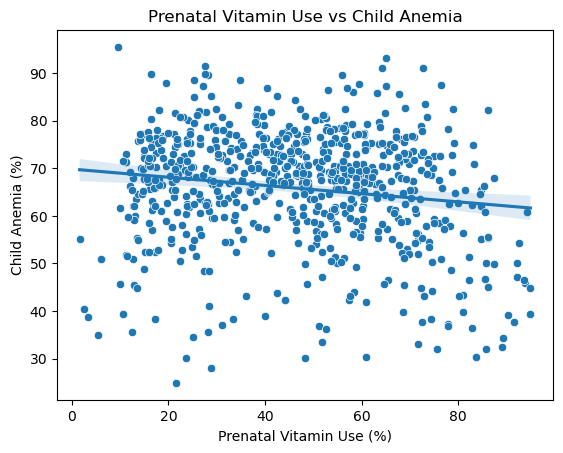

In [39]:
#Create a Scatterplot comparing folate (x-axis) and child_anemia (y-axis)
sns.scatterplot(x=new_df['folate'], y=new_df['child_anemia'])


#Add a regression line to the scatterplot
sns.regplot(x=new_df['folate'], y=new_df['child_anemia'], scatter=False)
plt.xlabel('Prenatal Vitamin Use (%)')
plt.ylabel('Child Anemia (%)')
plt.title('Prenatal Vitamin Use vs Child Anemia')
plt.show()

Conclusion #1: There is a significant association between prental vitamin use with child anemia prevalence (p < 0.001). The association between child anemia with breastfeeding (p = 0.732) and vitamin A supplementation (p=0.304) is not significant.

Question #2: Is there a significant association between hypertension in males or females with prenatal mineral use, vitamin a supplementation, and breastfeeding when controlling for state region?

In [ ]:
# Run a 2-level HLM Analysis with Level 1 predictors (folate, breastfeeding, and vitamin A) by state grouping
formula = 'men_hypertension ~ folate + vitamin_a + breastfeeding'
model = smf.mixedlm(formula, data=new_df, groups=new_df['state_id'])
result = model.fit()
print(result.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: men_hypertension
No. Observations: 706     Method:             REML            
No. Groups:       36      Scale:              18.3811         
Min. group size:  1       Log-Likelihood:     -2094.3081      
Max. group size:  75      Converged:          Yes             
Mean group size:  19.6                                        
---------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        20.344     2.125  9.573  0.000  16.178  24.509
folate            0.039     0.016  2.454  0.014   0.008   0.069
vitamin_a         0.007     0.021  0.357  0.721  -0.033   0.048
breastfeeding     0.051     0.019  2.622  0.009   0.013   0.089
Group Var        34.693     2.158                              



In [ ]:
# Run a 2-level HLM Analysis with Level 1 predictors (folate, breastfeeding, and vitamin A) by state grouping
formula = 'women_hypertension ~ folate + vitamin_a + breastfeeding'
model = smf.mixedlm(formula, data=new_df, groups=new_df['state_id'])
result = model.fit()
print(result.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: women_hypertension
No. Observations: 706     Method:             REML              
No. Groups:       36      Scale:              11.5686           
Min. group size:  1       Log-Likelihood:     -1927.0073        
Max. group size:  75      Converged:          Yes               
Mean group size:  19.6                                          
-----------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept         16.581     1.630  10.173  0.000  13.386  19.775
folate             0.049     0.012   3.963  0.000   0.025   0.073
vitamin_a          0.033     0.016   2.057  0.040   0.002   0.065
breastfeeding      0.014     0.015   0.907  0.364  -0.016   0.044
Group Var         16.218     1.308                               



Conclusion #2: There is a significant association between prenatal vitamin consumption and hypertension prevalence for both males (p-0.014) and females (p<0.001>). For males, there is also a significant relationship between breastfeeding and hypertension prevalence (p=0.009). For females, there is a significant association between vitamin A supplementation and hypertension prevalence (p=0.04).

Question #3: Is there a significant association between diabetes in males or females with prenatal mineral use, vitamin a supplementation, and breastfeeding when controlling for state region?

In [ ]:
# Run a 2-level HLM Analysis with Level 1 predictors (folate, breastfeeding, and vitamin A) by state grouping
formula = 'men_diabetes ~ folate + vitamin_a + breastfeeding'
model = smf.mixedlm(formula, data=new_df, groups=new_df['state_id'])
result = model.fit()
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: men_diabetes
No. Observations: 706     Method:             REML        
No. Groups:       36      Scale:              9.9203      
Min. group size:  1       Log-Likelihood:     -1874.1028  
Max. group size:  75      Converged:          Yes         
Mean group size:  19.6                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       16.551    1.527 10.836 0.000 13.557 19.545
folate           0.034    0.012  2.891 0.004  0.011  0.057
vitamin_a       -0.025    0.015 -1.671 0.095 -0.054  0.004
breastfeeding   -0.013    0.014 -0.898 0.369 -0.041  0.015
Group Var       14.854    1.312                           



In [ ]:
# Run a 2-level HLM Analysis with Level 1 predictors (folate, breastfeeding, and vitamin A) by state grouping
formula = 'women_diabetes ~ folate + vitamin_a + breastfeeding'
model = smf.mixedlm(formula, data=new_df, groups=new_df['state_id'])
result = model.fit()
print(result.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: women_diabetes
No. Observations: 706     Method:             REML          
No. Groups:       36      Scale:              7.3659        
Min. group size:  1       Log-Likelihood:     -1772.8032    
Max. group size:  75      Converged:          Yes           
Mean group size:  19.6                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         13.546    1.349 10.040 0.000 10.902 16.190
folate             0.046    0.010  4.533 0.000  0.026  0.066
vitamin_a         -0.014    0.013 -1.111 0.266 -0.040  0.011
breastfeeding     -0.021    0.012 -1.747 0.081 -0.045  0.003
Group Var         13.457    1.372                           



In [31]:
# Create an empty DataFrame to store the final result
df_bp = pd.DataFrame(columns=['district', 'hypertension', 'gender', 'folate'])

# Iterate over each row in new_df
for index, row in new_df.iterrows():
    # Create a DataFrame for men and concatenate with df_bp
    df_bp = pd.concat([df_bp, pd.DataFrame({'district': [row['district']], 'hypertension': [row['men_hypertension']], 'gender': ['men'], 'folate': [row['folate']]}), 
                       pd.DataFrame({'district': [row['district']], 'hypertension': [row['women_hypertension']], 'gender': ['women'], 'folate': [row['folate']]})],
                      ignore_index=True)

print(df_bp)

C:\Users\zach\AppData\Local\Temp\ipykernel_11364\3302861657.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_bp = pd.concat([df_bp, pd.DataFrame({'district': [row['district']], 'hypertension': [row['men_hypertension']], 'gender': ['men'], 'folate': [row['folate']]}),


                     district  hypertension gender  folate
0                    Nicobars          47.0    men    72.6
1                    Nicobars          35.4  women    72.6
2     North & Middle Andaman           32.2    men    83.7
3     North & Middle Andaman           27.4  women    83.7
4              South Andaman           26.9    men    81.0
...                       ...           ...    ...     ...
1407       Paschim Medinipur           19.3  women    64.3
1408         Purba Medinipur           21.3    men    51.6
1409         Purba Medinipur           18.1  women    51.6
1410      Paschim Barddhaman           20.7    men    57.0
1411      Paschim Barddhaman           17.6  women    57.0

[1412 rows x 4 columns]


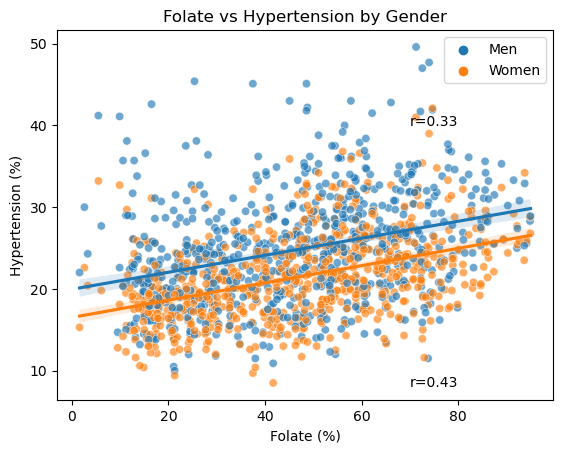

In [58]:
#Create a scatterplot with regression line comparing folate (x-axis) and hypertension (y) with different colors for gender
sns.scatterplot(x='folate', y='hypertension', hue='gender', alpha=0.65, data=df_bp)

#Add regression liness to the scatterplot
sns.regplot(x=new_df['folate'], y=new_df['men_hypertension'], scatter=False)

sns.regplot(x=new_df['folate'], y=new_df['women_hypertension'], scatter=False)

plt.xlabel('Folate (%)')
plt.ylabel('Hypertension (%)')
plt.title('Folate vs Hypertension by Gender')

r = new_df['folate'].corr(new_df['men_hypertension'])
_ = plt.text(70, 40, 'r={:.2f}'.format(r))

r = new_df['folate'].corr(new_df['women_hypertension'])
_ = plt.text(70, 8, 'r={:.2f}'.format(r))

# Access the legend and modify the labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.capitalize() for label in labels]

# Set the modified labels back to the legend
plt.legend(handles, labels)

plt.show()






Conclusion #3: There is a significant association between prenatal vitamin use and diabetes prevalence for both males (p=0.004) and females (p < 0.001>).